<i>STATUS: Draft</i>

<hr/>

In [20]:
import numpy as np
import sympy as sp
from IPython.display import HTML, IFrame
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools
from IPython.display import Image
import math
import itertools as iter



# function to print latex
def renderListToLatex(e):
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$$" + sp.latex(e[i]) + "$$")
    
    return(HTML("".join(latex_rendering[0:])))

<b>Observe</b>: This notebook assumes an understanding of signed area and Faulhaber's work on power series summation which can be used inform the construction of derivatives and integrals. These notes are included in in the Algebraic Calculus Notes (predominantly <i>AC2</i>) 


### DCB Curves (4)
#### Why classical calculus struggles with Archimedes' parabolic area 

<hr/>

<b>Aim</b>: To provide an overview of Archimedes' formula to calculate a parabolic area and the difficulty this presents for classical Calculus

<hr/>

<b>Observe</b>: The <b>Parabolic Area Formula</b>  to calculate a parabolic area (area under a parabolic curve, as shown below) is a famous theorem of Archimedes, which demonstrates that the parabolic area is both definable and computable.

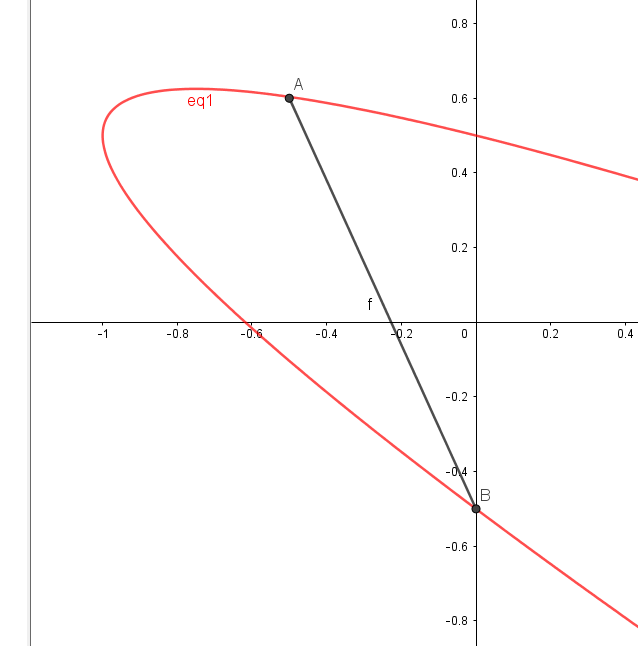

In [21]:
Image("./Images/DCB4_1.PNG", width = 500)

<b>Observe</b>: The parabolic area is different to areas of circles and hyperbolas, which require the use of circumscribed polygons, rectangles and yield approximate results. 

<b>Observe</b>: Because of the importance of area in relation to the parabola, Newton viewed the problem of integration as a generalisation of the problem of parabolic area and referred to these polynomial functions as generalised parabolas

<b>Reference</b>: This formula is also discussed in FMP6. 

<b>Observe</b>: It is difficult to prove this formula using standard calculus techniques

<b>Theorem (Archimedes)</b>: The area of a parabolic arc (visualised below) subtended by the chord $BC$ is $4/3$ times the area of the maximum inscribed triangle $\overline{EBC}$. Equivalently, it is $2/3$ times the area of the tangential triangle $\overline{CBD}$


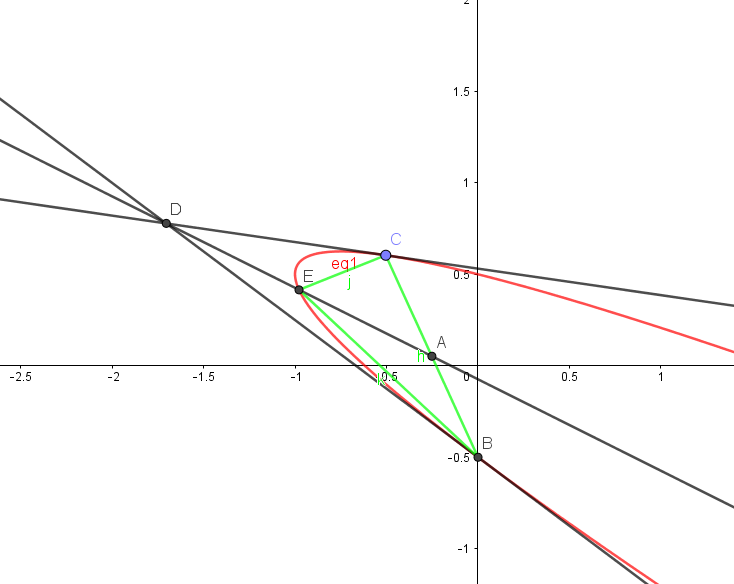

In [22]:
Image("./Images/DCB5_1.PNG", width=500)

<b>Observe</b>: It is possible to explore this in the context of the DCB Curve in the context of the parabolic curve formed by the locus of $P0, P1, Q0$ and $Q1$. 

<b>Let</b> $P0, P1 P2 \ldots$ is defined as unknown types. 

In [94]:
P0, P1, P2, P3, Q0, Q1, Q2, Q3, R0, R1, R2, R3, S0, S1, S2, S3, t, p01, p02, p11, p12, p21, p22 = sp.symbols('P0, P1, P2, P3, Q0, Q1, Q2, Q3, R0, R1, R2, R3, S0, S1, S2, S3, t, p01, p02, p11, p12, p21, p22 ')

<b>Let</b> $F0, F1$ and $F2$ be affine points (visualised below) to be used as a motivating example.

In [140]:
F0 = {"P0":np.array([1,4]) }
F1 = {"P1":np.array([6,7]) }
F2 = {"P2":np.array([8,-2]) }
F0, F1, F2

({'P0': array([1, 4])}, {'P1': array([6, 7])}, {'P2': array([ 8, -2])})

<b>Let</b> $F3$ be a visualisation of the parabola constructed using DCB curves with an inscribed triangle. 

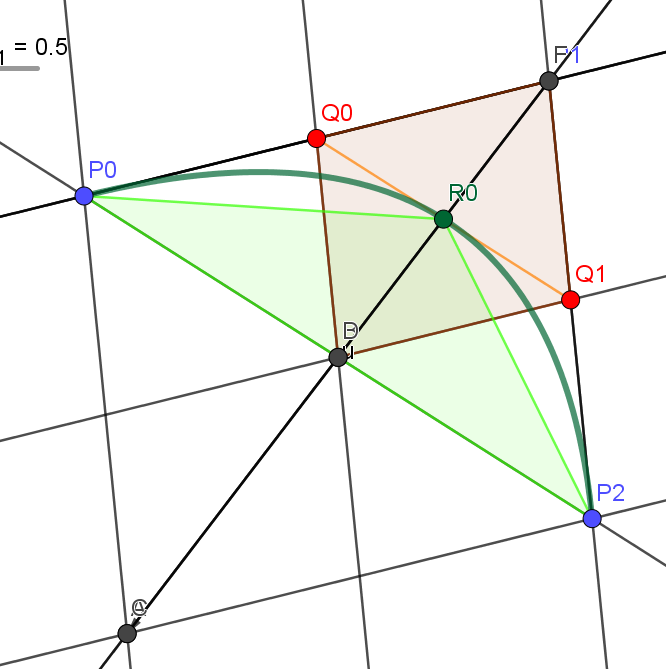

In [141]:
Image("./Images/DCB5_2.PNG", width=300)

<b>Observe</b>: Archimedes formula shows that there is a relationship between the curve bounded by the chord which is incident to $P0$ and $P2$ and the inscribed circle with vertices $P0, P2, R0$.



<b>Observe</b>: Recall the relationship between control points on dCB Curves where curves are constructed the through a locus of linear combinations between points. 

<b>Let</b> $F4, F5, F6$ and $F7$ be the control point relationships of quadratic DCB curve (which is equivalent to a parabola)

In [142]:
F4 = sp.Eq(Q0, (1 - t) * P0 + t * P1) 
F5 = sp.Eq(Q1, (1 - t) * P1 + t * P2)
F6 = sp.Eq(Q2, (1 - t) * P2 + t * P3) 

F7 = sp.Eq(R0, (1 - t) * Q0 + t * Q1) 


renderListToLatex([F4, F5, F6, F7])

<b>Observe</b>: the values $Q_0, Q_1, Q_2$ and $R_0$ comprised of linear combinations of vectors $P_i$ and $Q_i$ where $t$ is a value between 0 and 1.

<b>Let</b> $F8$ be a function that implements linear combination of 2 vectors. 

In [143]:
def F8(point1Choice, point2Choice, tChoice):
    p1 = point1Choice * (1 - tChoice)
    return(point1Choice * ( 1 - tChoice) + (point2Choice * tChoice))

<b>Let</b> $F9$ be an array of linear combinations that will be used visualise this idea established by the equations above.

In [144]:
F9 = [F8(np.array([1,8]), np.array([3,5]), i) for i in np.arange(0, 1.1, .1)]

<b>Let</b> $F10$ be of visualisation of linear combinations of between two points where the choice of $t$ is limited to values between and 0 and 1. 

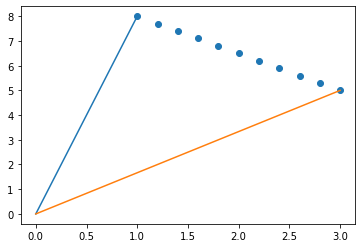

In [145]:
plt.scatter(*zip(*F9))
plt.plot([0,1], [0,8])
plt.plot([0,3], [0,5])

<b>Observe</b>: If $t$ is a value of either 0 or 1, it will be equivalent of either the blue of orange vector above. The blue dots represent different combinations between 0 and 1. 

<b>Let </b> $F11, F12$ and $F13$ be additional control points, $Q0, Q1$ and $R1$ based on the values chosen in $F0, F1$ and $F2$ as part of the motivating example visualised in $F3$ and $t = .5$

In [157]:
F11 = {"Q0": F8(F0["P0"], F1["P1"], .5)}
F12 = {"Q1" : F8(F1["P1"], F2["P2"], .5)}
F13 = {"R0": F8(F11["Q0"], F12["Q1"], .5)}
F11, F12, F13

({'Q0': array([3.5, 5.5])},
 {'Q1': array([7. , 2.5])},
 {'R0': array([5.25, 4.  ])})

<hr/>

<b>Aim</b>: Introduce summary of Algebraic Calculus to provide data structures and language that can be used to integrate the area in the example above. 

<hr/>

<b>Observe</b>: Recall that an oriented edge, which can be denoted as $ \vec{AB} = [A, B]$ is an ordered 2-list of affine points. It is variant under translation.

<b>Observe</b>: Recall that a vector, which can be denoted by $\overset{\rightharpoonup}{AB}$ is a line drawn between the affine point $A$ and the affine point $B$. 


<b>Observe</b>: Recall that for the points $A = [a_1, b_1]$ and $B = [b_1, b_2]$ the signed area of an orientated edge, $\vec{AB}$ is defined as: 

$$ s(\vec{AB}) = \frac{1}{2}(a_1b_2 - a_2b_1) $$

<b>Observe</b>: This is a determinant based view of area which does not require a prelimiary Euclidean metrical structure (of height and width) so it is purely affine. 

<b>Observe</b>: This formula is equivalent to the area of the orientated triangele, $\vec{OAB}$ where $O = [0, 0]$ is the origin 

<b>Let</b> $F1$ be a a functino that implements the signed area of an orientated edge  $ s(\vec{AB}) = \frac{1}{2}(a_1b_2 - a_2b_1) $

In [12]:
def F1(A, B):
    return(1/2) * (A[0] * B[1] - A[1] * B[0]) 

<b>Let</b> $F2, F3$ and $F4$ be orientated edges
    


In [26]:
F2 = np.array([5.41, 2.38])
F3 = np.array([6.42, 6.21])
F4 = np.array([1.51, 6.09])

<b>Let</b> $F5, F6$ and $F7$ be the area of the orientated edges

In [27]:
F5 = F1(F2, F3)
F6 = F1(F3, F4)
F7 = F1(F4, F2)
F5, F6, F7

(9.15825, 14.86035, -14.676549999999999)

<b>Let</b> $F7$ be the area of ABC


In [28]:
F8 = F5 + F6 + F7
F8

9.34205

<b>Observe</b> F8 is equivalent to calculating the area using a classical formula $\frac{1}{2}bh$ which can be seen in goebegra. 

Note you can also so this with splines 

A more gneral orientated polygonal spline (OPS) $\overrightarrow{A_0,A_1\ldots,A_n} = [A_0,A_1\ldots,A_n]$ is a list of affine points, and its signed area is defined to be: 

$$ s(\overrightarrow{A_0,A_1\ldots,A_n}) = \Sigma_{k = 0}^{n-1} s(\overrightarrow{A_kA_{k + 1}})$$

Geometrically this is the signed area of the region subtended from the origin $O = [0, 0]$. If $A_0 = A_n$, then $s(\overrightarrow{A_0,A_1\ldots,A_n}) $ becomes independent of translation. 

Additivity 

$$s_t^u(p,q) + s_u^v(p, q) = s_t^v(p,q) $$

Linearity 

$$ s_t^u(p + r, q) = s_t^u(p,q) + s_t^u(r,q) $$
$$ s_t^u(p, r + q) = s_t^u(p,r) + s_t^u(p,q) $$
$$ s_t^u(cp, q) = s_t^u(p,cq) = cs_t^u(cp,q) $$


Translation 

$$s_{t + c}^{u + c}(p, q) = s_t^u(p(c + \alpha), q(c = \alpha)) $$

Dilation 

$$ s_{ct}^{cu}(p, q) = s_t^u(p(c\alpha), q(c\alpha)) $$

5 poperties allow extneion signed areas to more gneral curves that are not just linear 

Allows moveing away from limits, reimann summs and can be extended to finite fields 

Need to introduce operators to do this, operations of Algebraic calculus, introduced implicityly by Johann Faulhaber in 1631 in the context of determination of furmulas for sums of powers of natrual numbers. 

Faulhaber Derivative (D) and Faulhaber Integral (S) as operators defined on polynumbers by the obvious linear extensions of the following rules, for natural numbers, $n = 0, 1, 2 \ldots$. The formulas arde: 

$$ D(\alpha^n) = n\alpha^{n - 1}$$

$$ S(\alpha^n) = \frac{\alpha^{n + 1}}{n + 1} $$

These can be defined purely algebracially, without connectiion to slopes, areas - Faulhaber intersted formulas for sums of pwers of natural numbers - where oeprators come from. 

Before newton and leibniz


Also a relative version of S, be defining, for numbers $t$ and $u$:

$$ S_t^u = S(p)(u) - S(p)(t)$$

Where they are being evaluated at u and t

It becomes possible to prove algebraically, the Product Rule, quotient rule, chain role and 




also the derievative Integral Composition Theorem: 

$$ D \circ S = I \text{ and  } S \circ D = I - I_0$$

where I is the indtity operator, and $I_0$ is the operator that takes the contstant part of the polynumber (i.e. the topmost entry) 

<b>Theorem</b>

There is exacly one way to extend the notion of singed areas $s_t^u(p, q)$ from linear polynumbers to more general polynumbers satisfying the above 5 properties. For $l, m$, naturalnumbers and not both 0:

$$s_t^u(\alpha^m, \alpha^n) = \frac{(n - m)}{2(n + m)} (u^{m + n} - t^{m + n})$$

Inteh special case, $m = n = 0$, we have simply $s_t^u(1, 1) = 0$

A more general form of this gives the signed integral of arbirary paramtrized, or dCB duves

Definition For a dCB curve $\gamma = [p, q]$ its area differential is: 

$$\delta(\gamma) = pD(q) - qD(p) $$


<b>Theroem</b>: for a dCB curve, $\gamma = [p,q]$ and numbers $t$ and $u$: 


$$s_t^u(\gamma) = s_t^u(p, q) = \frac{1}{2}S_t^u(\delta(\gamma)) = \frac{1}{2}S_t^u(p(D(q) - qD(p))$$

<hr/>

<b>Aim</b>: us formula to to prove problem